In [1]:
class TempArgs:
    pass
args = TempArgs()
args.Z = 5
args.folds = 5
args.img_size = 512

In [13]:
import numpy as np
import pandas as pd
import glob
import cv2
import pickle
import os
import _pickle as cPickle
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import StratifiedKFold
from joblib import dump, load


#Save only x stack images per EDF
#num images (ni) -> Focused-ni to focused+ni+1  ||| 2->5  3->7 4->9
if args.Z==3:
    ni=1
elif args.Z==5:
    ni=2
elif args.Z==7:
    ni=3
elif args.Z==9:
    ni=4

Y_EDF = []
for idx,image_name in enumerate(sorted(glob.glob(r"data/EDF/*.png"))):
    im = cv2.imread(image_name)
    imnew=cv2.resize(im,(args.img_size,args.img_size))
    Y_EDF.append(imnew)

Y_EDF = np.array(Y_EDF)

X_STACKS = []
for file in enumerate(glob.glob(r"data/*.csv",recursive=True)):
    print(file)
for idx,folder_name in enumerate(sorted(glob.glob(r"data/*",recursive=True))):
    print(folder_name)
    if (folder_name!='data/EDF') and (folder_name!='data/labels.csv'):
        X_STACKS_per_folder=[]
        for idxx,image_name in enumerate(glob.glob(os.path.join(folder_name, "*.png"))):
            im = cv2.imread(image_name)
            imnew=cv2.resize(im,(args.img_size,args.img_size))
            X_STACKS_per_folder.append(imnew)
            
        num_images_per_EDF=len(X_STACKS_per_folder)
        limit=round(num_images_per_EDF/2)
        X_STACKS_per_folder=X_STACKS_per_folder[limit-ni:limit+ni+1]       
        X_STACKS.append(X_STACKS_per_folder)
    
X_STACKS = np.array(X_STACKS)

X = np.array(X_STACKS)
Y = np.array(Y_EDF)

(0, 'data/labels.csv')
data/EDF
data/frame000_stack
data/frame001_stack
data/frame002_stack
data/frame003_stack
data/frame004_stack
data/frame005_stack
data/frame006_stack
data/frame007_stack
data/frame008_stack
data/frame009_stack
data/frame010_stack
data/frame011_stack
data/frame012_stack
data/frame013_stack
data/frame014_stack
data/frame015_stack
data/frame016_stack
data/frame017_stack
data/frame018_stack
data/frame019_stack
data/frame020_stack
data/frame021_stack
data/frame022_stack
data/frame023_stack
data/frame024_stack
data/frame025_stack
data/frame026_stack
data/frame027_stack
data/frame028_stack
data/frame029_stack
data/frame030_stack
data/frame031_stack
data/frame032_stack
data/frame033_stack
data/frame034_stack
data/frame035_stack
data/frame036_stack
data/frame037_stack
data/frame038_stack
data/frame039_stack
data/frame040_stack
data/frame041_stack
data/frame042_stack
data/frame043_stack
data/frame044_stack
data/frame045_stack
data/frame046_stack
data/frame047_stack
data/fra

In [7]:
len(X)

93

In [14]:
pic_order = 0
gt = Y[pic_order]
input_im = X[pic_order]

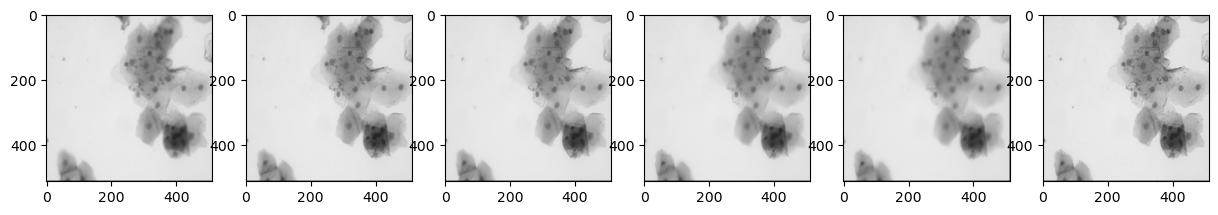

In [15]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 6, figsize=(15, 15))
axs[0].imshow(input_im[0], cmap='gray')
axs[1].imshow(input_im[1], cmap='gray')
axs[2].imshow(input_im[2], cmap='gray')
axs[3].imshow(input_im[3], cmap='gray')
axs[4].imshow(input_im[4], cmap='gray')
axs[5].imshow(gt, cmap='gray')